# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

Airbnb :-  Airbnb Inc. is an American San Francisco-based company operating an online marketplace for short- and long-term homestays and experiences.

Airbnb is a unique and widely recognized service that relies heavily on data analysis to make crucial business decisions. With millions of listings available on the platform, there is a vast amount of data that needs to be explored and analyzed to gain key insights. This data is used to enhance security, understand customer and host behavior, guide marketing initiatives, and implement innovative additional services. The dataset contains approximately 49,000 observations, with 16 columns consisting of both categorical and numeric values. Through exploration and analysis of this data, important understandings can be discovered.

# **GitHub Link -**

https://github.com/Varinder-KM/AirBnb-Bookings-Analysis-EDA

# **Problem Statement**


Perform Exploratory Data Analysis on the Dataset to get useful Insights

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import folium
from folium.plugins import FastMarkerCluster

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
dataset = pd.read_csv('/content/drive/MyDrive/Almabetter/Module 1 - Python For Data Science/Capstone Project: EDA/Airbnb NYC 2019.csv')

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('Rows Count:', dataset.shape[0])
print('Columns Count:', dataset.shape[1])

Rows Count: 48895
Columns Count: 16


### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Visualizing the missing values
missing_df = dataset.isna().sum()

In [ ]:
missing_df = missing_df*100/dataset.shape[0]

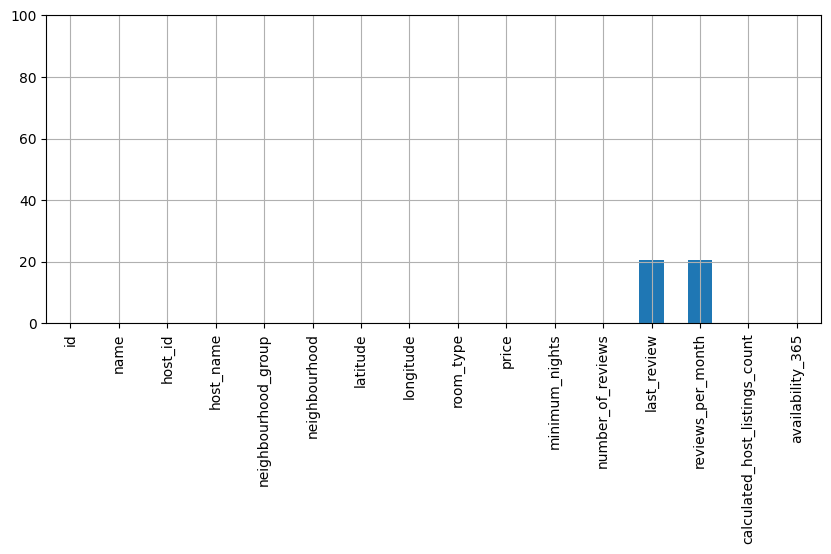

In [ ]:

fig, ax = plt.subplots(figsize=(10, 4))
missing_df.plot(kind='bar', ax=ax)
ax.set_ylim((0,100))
ax.grid()
plt.show()

<Axes: >

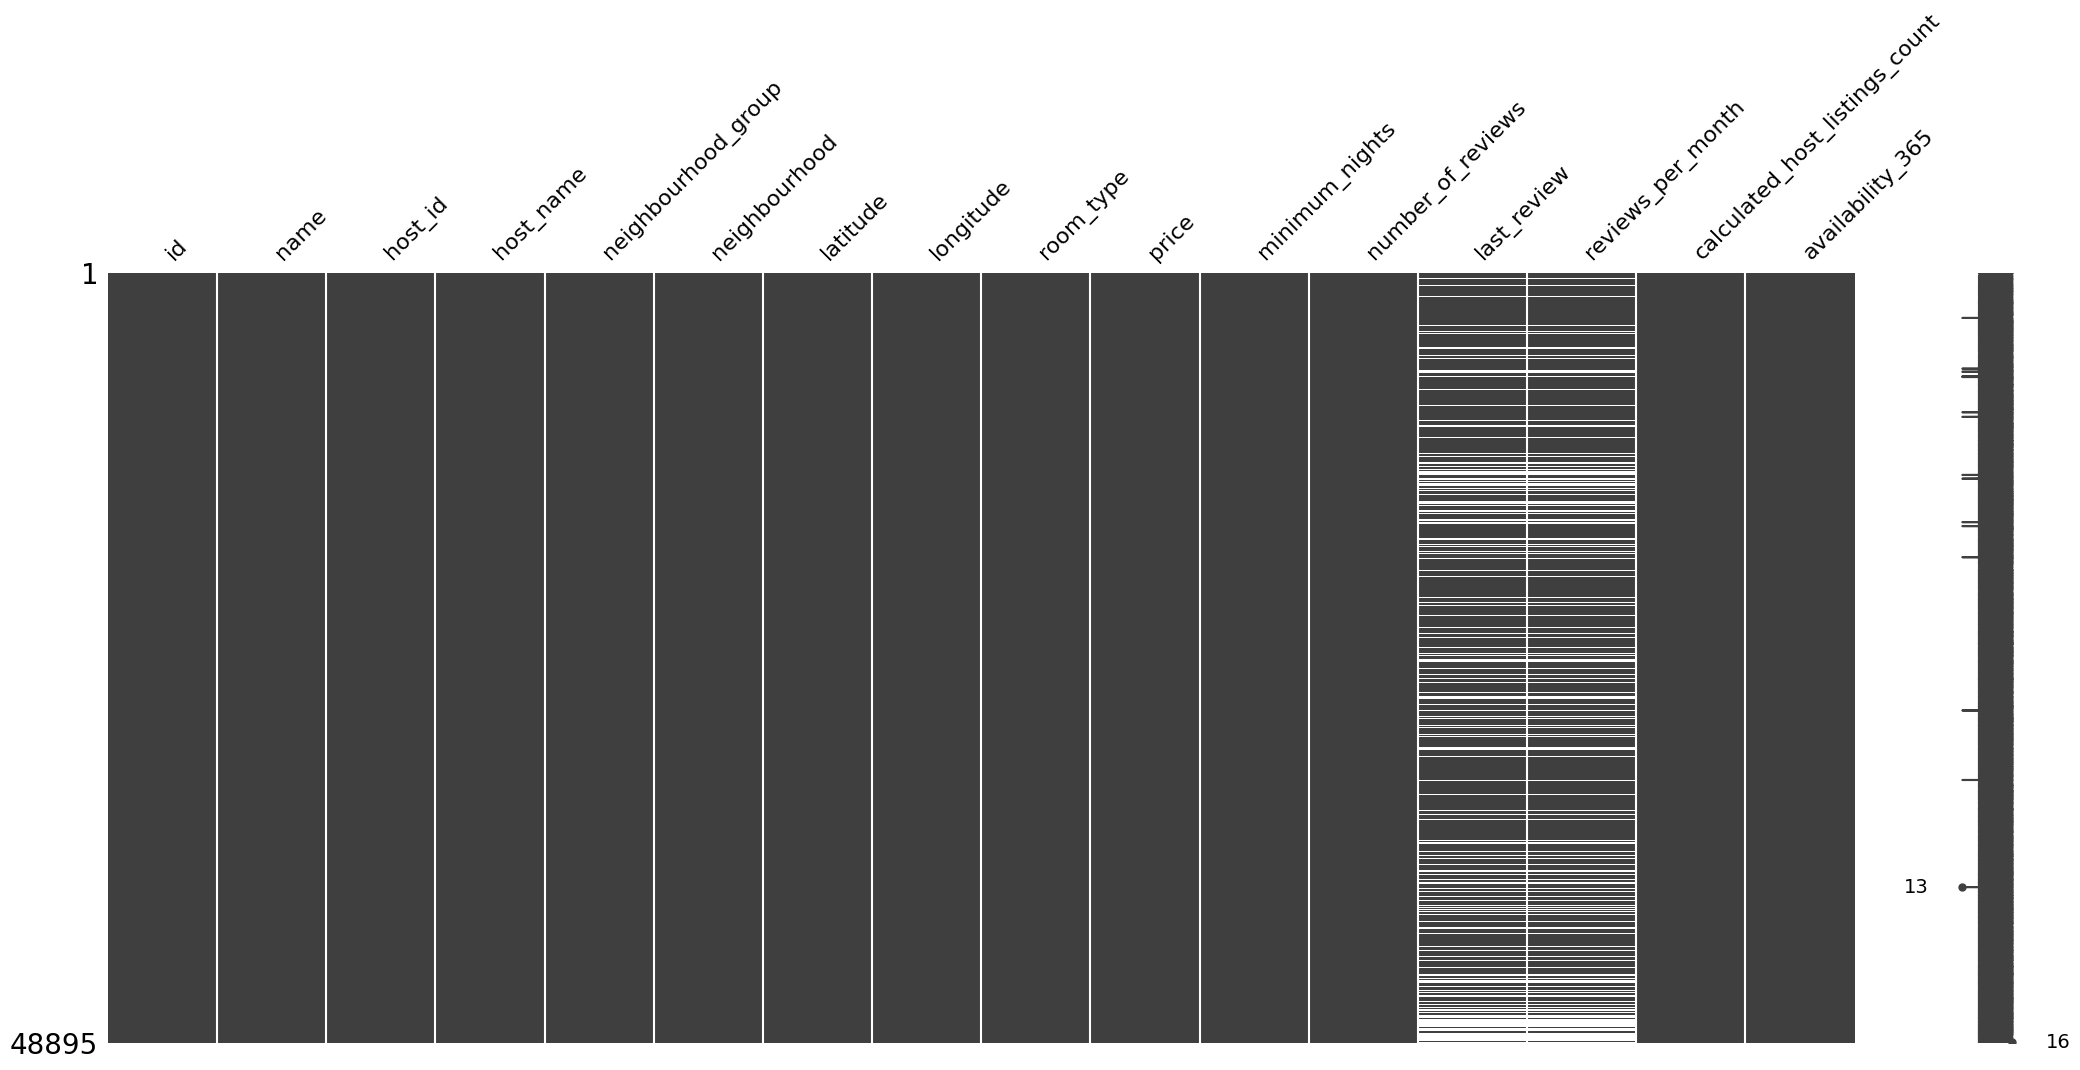

In [ ]:
msno.matrix(dataset)

### What did you know about your dataset?

* Dataset consiste 48895 rows and 16 columns.
* It has 10 Numerical and 6 object(categorical/String) columns.
* All columns are in proper format.
*It has 0 duplicated values.
*Columns 'name, host_name, last_review and review_per_month' have null/Missing values.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
# Dataset Describe
dataset[['price', 'minimum_nights',	'number_of_reviews',	'reviews_per_month',	'calculated_host_listings_count',	'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description

The dataset contains some Miss-enteries, since column 'price' have some 0 value entries.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in dataset.columns:
  print(f'{col} : {len(dataset[col].unique())}')

id : 48895
name : 47906
host_id : 37457
host_name : 11453
neighbourhood_group : 5
neighbourhood : 221
latitude : 19048
longitude : 14718
room_type : 3
price : 674
minimum_nights : 109
number_of_reviews : 394
last_review : 1765
reviews_per_month : 938
calculated_host_listings_count : 47
availability_365 : 366


In [ ]:
for col in ['neighbourhood_group', 'room_type', 'calculated_host_listings_count']:
  print(f'{col} : {dataset[col].unique()}')
  print(' ')

neighbourhood_group : ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
 
room_type : ['Private room' 'Entire home/apt' 'Shared room']
 
calculated_host_listings_count : [  6   2   1   4   3   5   7  13  28  11   8   9  52  18  15  19  10  39
  26  29  12  21  96  14  34  43 121  37  49  31  91  16  87  33  23  50
  20  25 232  17  47 103  65  30  27 327  32]
 


## 3. ***Data Wrangling***

### Data Wrangling Code

#### Handling Null Values

In [ ]:
df = dataset.copy()

In [ ]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df['name'].fillna('unknown', inplace=True)
df['host_name'].fillna('unknown', inplace=True)

In [ ]:
df[['name', 'host_name']].isna().sum()

name         0
host_name    0
dtype: int64

In [ ]:
df.drop(['last_review'], axis=1,  inplace=True)

In [ ]:
df['reviews_per_month'].fillna(0, inplace=True)

In [ ]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df = df[['name', 'host_name', 'neighbourhood_group',	'neighbourhood',	'latitude', 'longitude',	'room_type', 'price',	'minimum_nights',	'number_of_reviews',	'reviews_per_month',	'calculated_host_listings_count',	'availability_365']]

####Data Correction

summarization of the price data.

In [ ]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

After have a quick summary of the price data. it is clear that the Price ranges from  0−180. But there also exists price which has a maximum of $10000. This we cannot discard as an outlier because there are many scenarios in which price differs. The price varies on different factors which includes location,room type, neighbourhood , season etc. Also, we can see there are few values with 0, which can be due to dynamic pricing or the willingness of not to share the price with the Airbnb.

In [ ]:
df.loc[df['price']==0].shape

(11, 13)

As the Price column has very few observations with a 0 value, we can replace them with the median price of their respective areas.

In [ ]:
df.loc[(df['price']== 0) & (df['neighbourhood'] == 'Bedford-Stuyvesant'), 'price'] = df.loc[df['neighbourhood'] == 'Bedford-Stuyvesant', 'price'].median()

In [ ]:
df.loc[(df['price']== 0) & (df['neighbourhood'] == 'East Morrisania'), 'price'] = df.loc[df['neighbourhood'] == 'East Morrisania', 'price'].median()
df.loc[(df['price']== 0) & (df['neighbourhood'] == 'Bushwick'), 'price'] = df.loc[df['neighbourhood'] == 'Bushwick', 'price'].median()
df.loc[(df['price']== 0) & (df['neighbourhood'] == 'Greenpoint'), 'price'] = df.loc[df['neighbourhood'] == 'Greenpoint', 'price'].median()
df.loc[(df['price']== 0) & (df['neighbourhood'] == 'Williamsburg'), 'price'] = df.loc[df['neighbourhood'] == 'Williamsburg', 'price'].median()
df.loc[(df['price']== 0) & (df['neighbourhood'] == 'Murray Hill'), 'price'] = df.loc[df['neighbourhood'] == 'Murray Hill', 'price'].median()

In [ ]:
df['price'].describe()

count    48895.000000
mean       152.741170
std        240.145606
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

### What all manipulations have you done and insights you found?

* I replace Null values of 'name' and 'host_name' columns with 'unknown' value.
* I replace Null values of 'reviews_per_month' with 0.
* I drop unwanted columns ( 'id', 'host_id', 'last_review')
* Replcae 0 value of price column with median values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***